<a href="https://colab.research.google.com/github/jenny005/Reinforcement-Learning-by-Sutton-Barto/blob/main/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 : Finite Markov Decision Processes

# Example 3.5 Gridworld

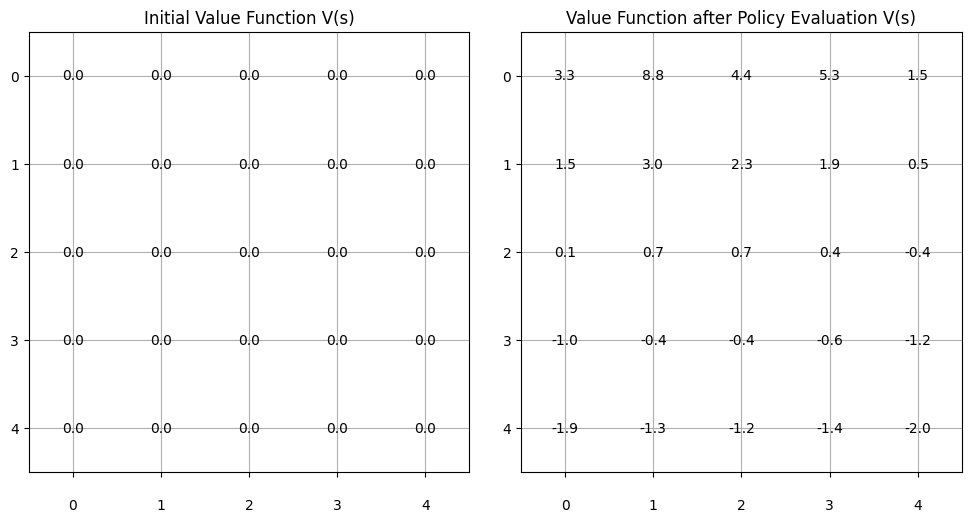

=== Initial Value Function ===
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0
=== Value Function: Uniform Random Policy (Figure 3.2) ===
+3.3 +8.8 +4.4 +5.3 +1.5
+1.5 +3.0 +2.3 +1.9 +0.5
+0.1 +0.7 +0.7 +0.4 -0.4
-1.0 -0.4 -0.4 -0.6 -1.2
-1.9 -1.3 -1.2 -1.4 -2.0


In [55]:
import numpy as np

class GridworldEnv:
    def __init__(self, height=5, width=5):
        self.height = height
        self.width = width
        self.action_space = [0, 1, 2, 3]  # 0: Up, 1: Down, 2: Left, 3: Right
        self.A = (0, 1)
        self.A_prime = (4, 1)
        self.B = (0, 3)
        self.B_prime = (2, 3)

    def step(self, state, action):
        i, j = state

        # Special teleportation rule
        if state == self.A:
            return self.A_prime, 10
        elif state == self.B:
            return self.B_prime, 5

        # Action direction mapping
        directions = {
            0: (-1, 0),  # Up
            1: (1, 0),   # Down
            2: (0, -1),  # Left
            3: (0, 1)    # Right
        }

        di, dj = directions[action]
        ni, nj = i + di, j + dj

        # Check boundary
        if 0 <= ni < self.height and 0 <= nj < self.width:
            return (ni, nj), 0
        else:
            return (i, j), -1

    def get_all_states(self):
        return [(i, j) for i in range(self.height) for j in range(self.width)]

    def get_available_actions(self, state):
        return self.action_space

# Initialize environment
env = GridworldEnv()
V = np.zeros((env.height, env.width))  # Initial value function set to zero
V_init = V.copy()  # Save initial state for comparison

gamma = 0.9
theta = 1e-4

# Policy evaluation loop
while True:
    delta = 0
    V_new = V.copy()
    for state in env.get_all_states():
        v = 0
        for a in env.action_space:
            next_state, reward = env.step(state, a)
            v += 0.25 * (reward + gamma * V[next_state])  # uniform random policy, so 0.25 prob for each action
        V_new[state] = v
        delta = max(delta, abs(V[state] - v))
    V = V_new
    if delta < theta:
        break

import matplotlib.pyplot as plt

plt.close('all')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for ax, V_data, title in zip(axs, [V_init, V],
                            ["Initial Value Function V(s)", "Value Function after Policy Evaluation V(s)"]):
    ax.set_title(title)
    ax.set_xticks(range(env.width))
    ax.set_yticks(range(env.height))
    ax.invert_yaxis()
    ax.set_xticklabels(range(env.width))
    ax.set_yticklabels(range(env.height))
    ax.grid(True)
    ax.set_aspect('equal')  # Make cells square

    # Move x-axis tick labels farther away
    ax.tick_params(axis='x', which='both', pad=15)

    # Set limits slightly beyond edges to center text nicely
    ax.set_xlim(-0.5, env.width - 0.5)
    ax.set_ylim(env.height - 0.5, -0.5)

    # Add text labels centered in each cell
    for i in range(env.height):
        for j in range(env.width):
            ax.text(j, i, f"{V_data[i, j]:.1f}", ha='center', va='center')

plt.tight_layout()
plt.show()


# Print initial value function
print("=== Initial Value Function ===")
for i in range(env.height):
    row_values = ""
    for j in range(env.width):
        val = V_init[i, j]
        row_values += f"{val:+.1f} "
    print(row_values.strip())

print("=== Value Function: Uniform Random Policy (Figure 3.2) ===")
for i in range(env.height):
    row_values = ""
    for j in range(env.width):
        val = V[i, j]
        row_values += f"{val:+.1f} "  # + sign, 1 decimal place, space-separated
    print(row_values.strip())


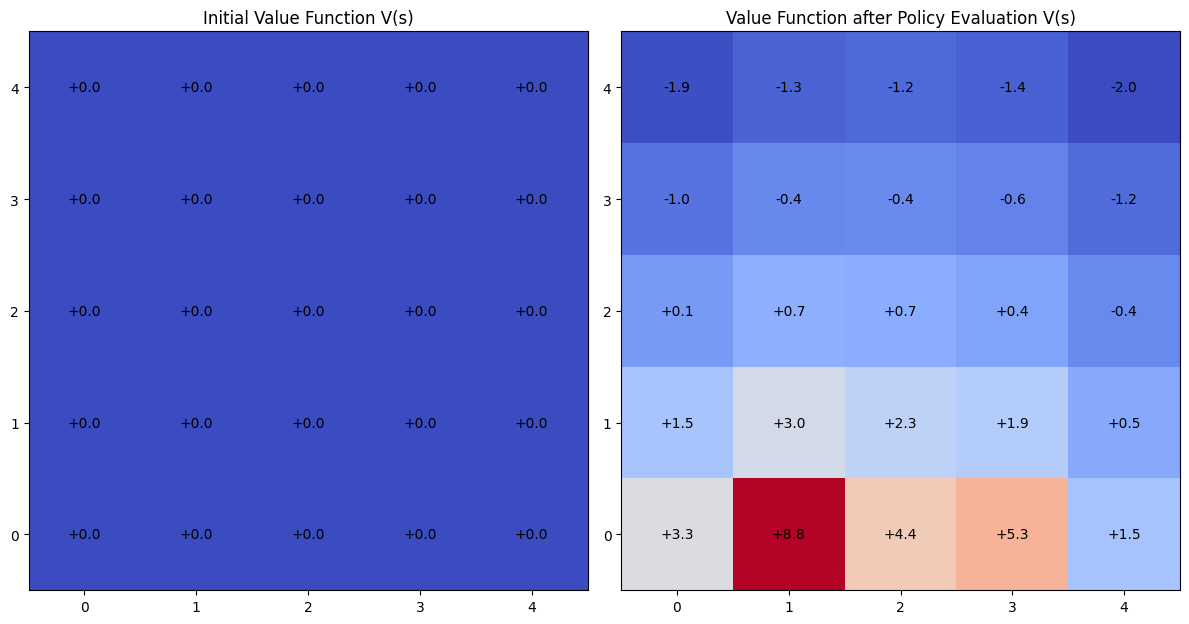

In [57]:
# For Jupyter/Colab inline plots
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

class GridworldEnv:
    def __init__(self, height=5, width=5):
        self.height = height
        self.width = width
        self.action_space = [0, 1, 2, 3]  # 0: Up, 1: Down, 2: Left, 3: Right
        self.A = (0, 1)
        self.A_prime = (4, 1)
        self.B = (0, 3)
        self.B_prime = (2, 3)

    def step(self, state, action):
        i, j = state

        # Special teleportation rule
        if state == self.A:
            return self.A_prime, 10
        elif state == self.B:
            return self.B_prime, 5

        # Action direction mapping
        directions = {
            0: (-1, 0),  # Up
            1: (1, 0),   # Down
            2: (0, -1),  # Left
            3: (0, 1)    # Right
        }

        di, dj = directions[action]
        ni, nj = i + di, j + dj

        # Check boundary
        if 0 <= ni < self.height and 0 <= nj < self.width:
            return (ni, nj), 0
        else:
            return (i, j), -1

    def get_all_states(self):
        return [(i, j) for i in range(self.height) for j in range(self.width)]

    def get_available_actions(self, state):
        return self.action_space

# Initialize environment
env = GridworldEnv()
V = np.zeros((env.height, env.width))  # Initial value function set to zero
V_init = V.copy()  # Save initial state for comparison

gamma = 0.9
theta = 1e-4

# Policy evaluation loop
while True:
    delta = 0
    V_new = V.copy()
    for state in env.get_all_states():
        v = 0
        for a in env.action_space:
            next_state, reward = env.step(state, a)
            v += 0.25 * (reward + gamma * V[next_state])  # uniform random policy, 0.25 prob per action
        V_new[state] = v
        delta = max(delta, abs(V[state] - v))
    V = V_new
    if delta < theta:
        break

# Clear previous plots if any
plt.close('all')

# Visualize initial and final value functions side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Initial value function
axs[0].imshow(V_init, cmap='coolwarm', interpolation='none')
axs[0].set_title("Initial Value Function V(s)")
axs[0].set_xticks(range(env.width))
axs[0].set_yticks(range(env.height))
axs[0].invert_yaxis()
for i in range(env.height):
    for j in range(env.width):
        axs[0].text(j, i, f"{V_init[i, j]:.1f}", ha='center', va='center', color='black')

# Value function after policy evaluation
axs[1].imshow(V, cmap='coolwarm', interpolation='none')
axs[1].set_title("Value Function after Policy Evaluation V(s)")
axs[1].set_xticks(range(env.width))
axs[1].set_yticks(range(env.height))
axs[1].invert_yaxis()
for i in range(env.height):
    for j in range(env.width):
        axs[1].text(j, i, f"{V[i, j]:.1f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


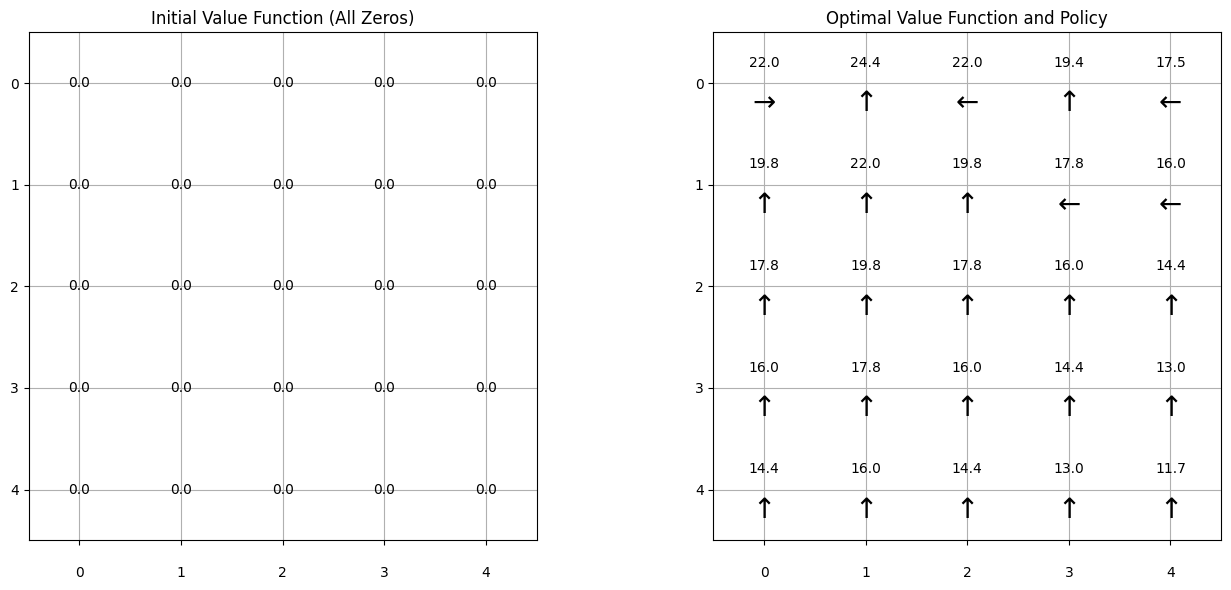

=== Initial Value Function ===
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0
+0.0 +0.0 +0.0 +0.0 +0.0

=== Optimal Value Function ===
+22.0 +24.4 +22.0 +19.4 +17.5
+19.8 +22.0 +19.8 +17.8 +16.0
+17.8 +19.8 +17.8 +16.0 +14.4
+16.0 +17.8 +16.0 +14.4 +13.0
+14.4 +16.0 +14.4 +13.0 +11.7

=== Optimal Policy ===
→ ↑ ← ↑ ←
↑ ↑ ↑ ← ←
↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑


In [54]:
import numpy as np
import matplotlib.pyplot as plt

class GridworldEnv:
    def __init__(self, height=5, width=5):
        self.height = height
        self.width = width
        self.action_space = [0, 1, 2, 3]  # 0: Up, 1: Down, 2: Left, 3: Right
        self.A = (0, 1)
        self.A_prime = (4, 1)
        self.B = (0, 3)
        self.B_prime = (2, 3)

    def step(self, state, action):
        i, j = state

        # Special teleportation rule
        if state == self.A:
            return self.A_prime, 10
        elif state == self.B:
            return self.B_prime, 5

        # Action direction mapping
        directions = {
            0: (-1, 0),  # Up
            1: (1, 0),   # Down
            2: (0, -1),  # Left
            3: (0, 1)    # Right
        }

        di, dj = directions[action]
        ni, nj = i + di, j + dj

        # Check boundary
        if 0 <= ni < self.height and 0 <= nj < self.width:
            return (ni, nj), 0
        else:
            return (i, j), -1

    def get_all_states(self):
        return [(i, j) for i in range(self.height) for j in range(self.width)]

    def get_available_actions(self, state):
        return self.action_space

# Initialize environment
env = GridworldEnv()

gamma = 0.9
theta = 1e-4

# Initial value function all zeros
V_init = np.zeros((env.height, env.width))

# Optimal value iteration
V_opt = np.zeros((env.height, env.width))
while True:
    delta = 0
    V_new = V_opt.copy()
    for state in env.get_all_states():
        action_values = []
        for a in env.action_space:
            next_state, reward = env.step(state, a)
            action_values.append(reward + gamma * V_opt[next_state])
        max_value = max(action_values)
        V_new[state] = max_value
        delta = max(delta, abs(V_opt[state] - max_value))
    V_opt = V_new
    if delta < theta:
        break

# Extract optimal policy arrows
policy_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}
optimal_policy = np.empty((env.height, env.width), dtype=str)
for state in env.get_all_states():
    action_values = []
    for a in env.action_space:
        next_state, reward = env.step(state, a)
        action_values.append(reward + gamma * V_opt[next_state])
    best_action = np.argmax(action_values)
    optimal_policy[state] = policy_arrows[best_action]

# Plotting side by side
plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left: initial value function (all zeros)
axs[0].set_title("Initial Value Function (All Zeros)")
axs[0].set_xticks(range(env.width))
axs[0].set_yticks(range(env.height))
axs[0].invert_yaxis()
axs[0].set_xticklabels(range(env.width))
axs[0].set_yticklabels(range(env.height))
axs[0].grid(True)
axs[0].set_aspect('equal')
axs[0].set_xlim(-0.5, env.width - 0.5)
axs[0].set_ylim(env.height - 0.5, -0.5)
axs[0].tick_params(axis='x', which='both', pad=15)

for i in range(env.height):
    for j in range(env.width):
        axs[0].text(j, i, f"{V_init[i, j]:.1f}", ha='center', va='center')

# Right: optimal value function + policy arrows
axs[1].set_title("Optimal Value Function and Policy")
axs[1].set_xticks(range(env.width))
axs[1].set_yticks(range(env.height))
axs[1].invert_yaxis()
axs[1].set_xticklabels(range(env.width))
axs[1].set_yticklabels(range(env.height))
axs[1].grid(True)
axs[1].set_aspect('equal')
axs[1].set_xlim(-0.5, env.width - 0.5)
axs[1].set_ylim(env.height - 0.5, -0.5)
axs[1].tick_params(axis='x', which='both', pad=15)

for i in range(env.height):
    for j in range(env.width):
        axs[1].text(j, i - 0.2, f"{V_opt[i, j]:.1f}", ha='center', va='center', fontsize=10)
        axs[1].text(j, i + 0.2, optimal_policy[i, j], ha='center', va='center', fontsize=20)

plt.tight_layout()
plt.show()

# Print initial value function
print("=== Initial Value Function ===")
for i in range(env.height):
    row_values = ""
    for j in range(env.width):
        val = V_init[i, j]
        row_values += f"{val:+.1f} "
    print(row_values.strip())

# Print optimal value function and policy
print("\n=== Optimal Value Function ===")
for i in range(env.height):
    row_values = ""
    for j in range(env.width):
        val = V_opt[i, j]
        row_values += f"{val:+.1f} "
    print(row_values.strip())

print("\n=== Optimal Policy ===")
for i in range(env.height):
    row_policy = ""
    for j in range(env.width):
        row_policy += f"{optimal_policy[i, j]} "
    print(row_policy.strip())


In [58]:
# modify from
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################


import numpy as np
import pandas as pd

# --- Gridworld Setup (Figure 3.2) ---
WORLD_SIZE = 5
DISCOUNT = 0.9
ACTION_PROB = 0.25

A_POS = (0, 1)
A_PRIME_POS = (4, 1)
B_POS = (0, 3)
B_PRIME_POS = (2, 3)

ACTIONS = [
    np.array([0, -1]),  # Left
    np.array([-1, 0]),  # Up
    np.array([0, 1]),   # Right
    np.array([1, 0])    # Down
]

def step(state, action):
    """Transition dynamics following Figure 3.2 logic."""
    if tuple(state) == A_POS:
        return A_PRIME_POS, 10
    if tuple(state) == B_POS:
        return B_PRIME_POS, 5

    next_state = np.array(state) + action
    if 0 <= next_state[0] < WORLD_SIZE and 0 <= next_state[1] < WORLD_SIZE:
        return tuple(next_state), 0  # valid move
    else:
        return tuple(state), -1      # wall hit

def evaluate_uniform_random_policy():
    """Evaluate uniform random policy using iterative policy evaluation."""
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                v = 0
                for action in ACTIONS:
                    (ni, nj), reward = step((i, j), action)
                    v += ACTION_PROB * (reward + DISCOUNT * value[ni, nj])
                new_value[i, j] = v
        if np.sum(np.abs(new_value - value)) < 1e-4:
            break
        value = new_value
    return np.round(value, decimals=1)

def format_value_grid(value_grid):
    """Formats the grid for clean display."""
    return [["{:+.1f}".format(v) for v in row] for row in value_grid]

if __name__ == "__main__":
    value_grid = evaluate_uniform_random_policy()
    formatted_grid = format_value_grid(value_grid)

    # Display as a pandas DataFrame
    df = pd.DataFrame(formatted_grid)
    print("=== Value Function: Uniform Random Policy (Figure 3.2) ===")
    print(df.to_string(index=False, header=False))


=== Value Function: Uniform Random Policy (Figure 3.2) ===
+3.3 +8.8 +4.4 +5.3 +1.5
+1.5 +3.0 +2.3 +1.9 +0.5
+0.1 +0.7 +0.7 +0.4 -0.4
-1.0 -0.4 -0.4 -0.6 -1.2
-1.9 -1.3 -1.2 -1.4 -2.0


In [59]:
# modify from
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import pandas as pd

# --- Gridworld Setup (Figure 3.5) ---
WORLD_SIZE = 5
DISCOUNT = 0.9
A_POS = (0, 1)
A_PRIME_POS = (4, 1)
B_POS = (0, 3)
B_PRIME_POS = (2, 3)

ACTIONS = [
    np.array([0, -1]),  # Left
    np.array([-1, 0]),  # Up
    np.array([0, 1]),   # Right
    np.array([1, 0])    # Down
]
ACTION_SYMBOLS = ['←', '↑', '→', '↓']

def step(state, action):
    if tuple(state) == A_POS:
        return A_PRIME_POS, 10
    if tuple(state) == B_POS:
        return B_PRIME_POS, 5

    next_state = np.array(state) + action
    if 0 <= next_state[0] < WORLD_SIZE and 0 <= next_state[1] < WORLD_SIZE:
        return tuple(next_state), 0
    else:
        return tuple(state), -1

def value_iteration(theta=1e-4):
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        delta = 0
        new_value = np.copy(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                v_list = []
                for action in ACTIONS:
                    (ni, nj), reward = step((i, j), action)
                    v = reward + DISCOUNT * value[ni, nj]
                    v_list.append(v)
                best_v = max(v_list)
                new_value[i, j] = best_v
                delta = max(delta, abs(best_v - value[i, j]))
        value = new_value
        if delta < theta:
            break
    return np.round(value, 1)

def extract_policy(value):
    policy_grid = [['' for _ in range(WORLD_SIZE)] for _ in range(WORLD_SIZE)]
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            v_list = []
            for idx, action in enumerate(ACTIONS):
                (ni, nj), reward = step((i, j), action)
                v = reward + DISCOUNT * value[ni, nj]
                v_list.append((v, idx))
            max_v = max(v_list)[0]
            best_actions = [ACTION_SYMBOLS[idx] for v, idx in v_list if v == max_v]
            policy_grid[i][j] = ''.join(best_actions)
    return policy_grid

def print_grid(grid, title):
    print(f"\n=== {title} ===")
    for row in grid:
        print(' '.join(str(x).rjust(4) for x in row))

if __name__ == "__main__":
    optimal_value = value_iteration()
    optimal_policy = extract_policy(optimal_value)

    print_grid(optimal_value, "Optimal Value Function (Figure 3.5)")
    print_grid(optimal_policy, "Optimal Policy (Arrows)")


=== Optimal Value Function (Figure 3.5) ===
22.0 24.4 22.0 19.4 17.5
19.8 22.0 19.8 17.8 16.0
17.8 19.8 17.8 16.0 14.4
16.0 17.8 16.0 14.4 13.0
14.4 16.0 14.4 13.0 11.7

=== Optimal Policy (Arrows) ===
   → ←↑→↓    ← ←↑→↓    ←
  ↑→    ↑   ←↑    ←    ←
  ↑→    ↑   ←↑   ←↑   ←↑
  ↑→    ↑   ←↑   ←↑   ←↑
  ↑→    ↑   ←↑   ←↑   ←↑
